In [37]:
import pandas as pd
import glob

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

from experiments_core import run_tests_splits
from experiments_core import run_one_experiment
from experiments_core import print_baseline_results
from experiments_core import default_tokenize
from experiments_core import tokenize_stems
from experiments_core import tokenize_lemmas
from experiments_core import tokenize_no_urls
from experiments_core import tokenize_norm_letters

from nltk.corpus import stopwords

%matplotlib inline

In [38]:
import importlib
import sys
importlib.reload(sys.modules[run_tests_splits.__module__])
importlib.reload(sys.modules[run_one_experiment.__module__])
importlib.reload(sys.modules[print_baseline_results.__module__])
importlib.reload(sys.modules[default_tokenize.__module__])
importlib.reload(sys.modules[tokenize_stems.__module__])
importlib.reload(sys.modules[tokenize_lemmas.__module__])
importlib.reload(sys.modules[tokenize_no_urls.__module__])
importlib.reload(sys.modules[tokenize_norm_letters.__module__])

<module 'experiments_core' from '/home/ctorres9/EAFIT/trabajogrado/experiments/experiments_core.py'>

In [3]:
files_path = 'data/satirical_real_news_tweets/'
all_files = glob.glob(files_path + "/*.csv")
print("Numero de archivos:", len(all_files))
original_news_df = pd.DataFrame()
files_list = []
for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0, sep='\t')
    files_list.append(df)
original_news_df = pd.concat(files_list, ignore_index=True)
original_news_df = original_news_df.drop(columns=['Unnamed: 0'])
print(original_news_df.describe())
print(original_news_df.head())

Numero de archivos: 16
                                                     text target
count                                               10000  10000
unique                                               9992      2
top     José Manuel Soria compromete a Rajoy al oculta...   fake
freq                                                    2   5000
                                                text target
0  Las lágrimas de un niño con autismo en un conc...   real
1  Vender carne de mono por ternera https://t.co/...   real
2  #Psicología Si buscas olvido en internet, verá...   real
3  El cantante congoleño Papa Wemba fallece en pl...   real
4  #Lomásvisto Vender carne de mono por ternera h...   real


In [4]:
total_data_content = original_news_df.text
total_data_target = original_news_df.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(total_data_content, 
                                                    total_data_target, 
                                                    test_size=0.3, 
                                                    random_state=70)

In [6]:
print("Reales entrenamiento:", len(y_train[y_train == 'real']))
print("Fakes entrenamiento:", len(y_train[y_train == 'fake']))
print("Reales pruebas:", len(y_test[y_test == 'real']))
print("Fakes pruebas:", len(y_test[y_test == 'fake']))

Reales entrenamiento: 3525
Fakes entrenamiento: 3475
Reales pruebas: 1475
Fakes pruebas: 1525


# Experimentos con el clasificador SVM radial y el metodo de ponderacion TF (Term Frequency)
Los siguientes son los experimentos realizados para el clasificador SVM con kernel radial y con el metodo de ponderación para el modelo de espacio vectorial usando TF (Term Frequency)

# Linea base

In [7]:
tf_vect_baseline = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True)

In [8]:
parameters_svm_rbf = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}

In [9]:
%%time
tf_baseline_results = run_tests_splits(total_data_content, total_data_target, tf_vect_baseline, parameters_svm_rbf, SVC())

random state:  10
train time: 33.464s
random state:  20
train time: 31.797s
random state:  30
train time: 48.831s
random state:  40
train time: 40.651s
random state:  50
train time: 67.935s
random state:  60
train time: 63.236s
random state:  70
train time: 75.713s
random state:  80
train time: 81.336s
random state:  90
train time: 65.712s
random state:  100
train time: 52.684s
CPU times: user 2min 4s, sys: 13.9 s, total: 2min 18s
Wall time: 10min 4s


Numero de caracteristicas:  (7000, 23367)

Best score selected:  0.8885714285714286
Best Accuracy:  0.8856666666666667
Best Best F1-score:  0.8856361569347557
Best random state:  90
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8885714285714286
C: 100
gamma: 0.001
kernel: 'rbf'


Exactitud: 0.8856666666666667
F1_score: 0.8856361569347557
Precision: 0.8856047460905555
Recall: 0.8858820745632626

             precision    recall  f1-score   support

       fake     0.8740    0.8938    0.8838      1459
       real     0.8972    0.8780    0.8875      1541

avg / total     0.8859    0.8857    0.8857      3000

[[1304  155]
 [ 188 1353]]

Confusion matrix, without normalization
[[1304  155]
 [ 188 1353]]


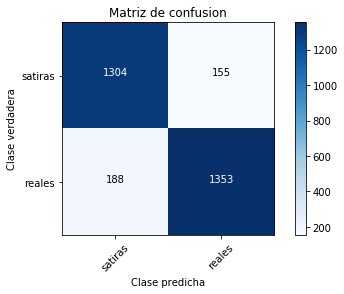

In [10]:
print_baseline_results(tf_baseline_results, parameters_svm_rbf)

In [41]:
all_experiments_results = []

## Prueba de la linea base con los parametros optimos
Esta prueba se hace para validar los resultados obtenidos anteriormente. Si esta bien debe dar lo mismo o un resultado muy similar dependiendo del clasificador.

Numero de caracteristicas:  (7000, 23367)

train time: 17.854s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8885714285714286
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8856666666666667
F1_score: 0.8856361569347557
Precision: 0.8856047460905555
Recall: 0.8858820745632626

             precision    recall  f1-score   support

       fake     0.8740    0.8938    0.8838      1459
       real     0.8972    0.8780    0.8875      1541

avg / total     0.8859    0.8857    0.8857      3000

[[1304  155]
 [ 188 1353]]

Confusion matrix, without normalization
[[1304  155]
 [ 188 1353]]
CPU times: user 9.58 s, sys: 1.18 s, total: 10.8 s
Wall time: 21.5 s


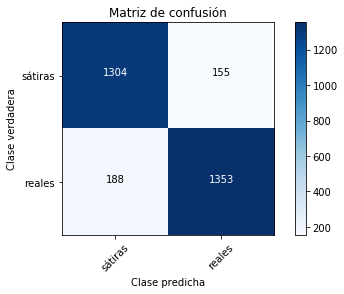

In [42]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_baseline = run_one_experiment(total_data_content, total_data_target, tf_vect_baseline, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_tf_vect_baseline)

## Experimento 1: Remocion de stop words

In [43]:
spanish_stopwords = stopwords.words('spanish')

In [44]:
tf_vect_stopwords = CountVectorizer(stop_words = spanish_stopwords,
                                    analyzer = 'word',
                                    tokenizer = default_tokenize,
                                    lowercase = True)

Numero de caracteristicas:  (7000, 23179)

train time: 13.956s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8857142857142857
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8766666666666667
F1_score: 0.8766646933017596
Precision: 0.877620994388105
Recall: 0.8774315388519156

             precision    recall  f1-score   support

       fake     0.8506    0.9054    0.8772      1459
       real     0.9046    0.8494    0.8762      1541

avg / total     0.8784    0.8767    0.8767      3000

[[1321  138]
 [ 232 1309]]

Confusion matrix, without normalization
[[1321  138]
 [ 232 1309]]
CPU times: user 7.53 s, sys: 1.02 s, total: 8.55 s
Wall time: 16.7 s


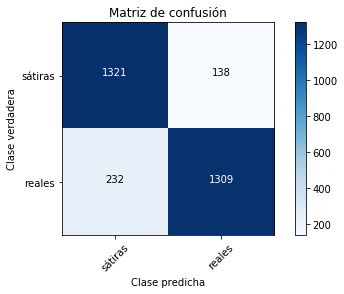

In [45]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_stopwords = run_one_experiment(total_data_content, total_data_target, tf_vect_stopwords, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_tf_vect_stopwords)

## Experimento 2: Stemming

In [46]:
#Prueba de los metodos anteriores
print(tokenize_stems(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaa', 'com', 'estas', 'estaa', 'cre', 'en', 'mi', 'si', 'llov', 'mañan', 'tu', 'cre', 'en', 'mi', 'cart', 'aeiou']


In [47]:
tf_vect_stemming = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True)

Numero de caracteristicas:  (7000, 17699)

train time: 16.495s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8805714285714286
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8826666666666667
F1_score: 0.8826165308827458
Precision: 0.8825503131947194
Recall: 0.8827612985523852

             precision    recall  f1-score   support

       fake     0.8742    0.8862    0.8802      1459
       real     0.8909    0.8793    0.8850      1541

avg / total     0.8828    0.8827    0.8827      3000

[[1293  166]
 [ 186 1355]]

Confusion matrix, without normalization
[[1293  166]
 [ 186 1355]]
CPU times: user 14.1 s, sys: 1.36 s, total: 15.4 s
Wall time: 24.5 s


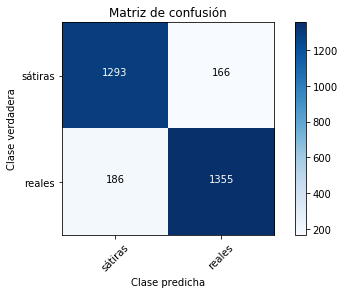

In [48]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_stemming = run_one_experiment(total_data_content, total_data_target, tf_vect_stemming, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_tf_vect_stemming)

## Experimento 3: Lematizacion

In [49]:
# Prueba del tokenizer
print(tokenize_lemmas(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaaa', 'comer', 'este', 'estaaaas', 'creer', 'en', 'mi', 'si', 'llover', 'mañana', 'tu', 'creer', 'en', 'mi', 'carta', 'aeiou']


In [50]:
tf_vect_lemmatize = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True)

Numero de caracteristicas:  (7000, 18693)

train time: 16.389s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8791428571428571
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8766666666666667
F1_score: 0.8766376628105008
Precision: 0.8766252958366204
Recall: 0.8769026993055701

             precision    recall  f1-score   support

       fake     0.8642    0.8855    0.8747      1459
       real     0.8890    0.8683    0.8785      1541

avg / total     0.8770    0.8767    0.8767      3000

[[1292  167]
 [ 203 1338]]

Confusion matrix, without normalization
[[1292  167]
 [ 203 1338]]
CPU times: user 9.87 s, sys: 1.58 s, total: 11.4 s
Wall time: 20.1 s


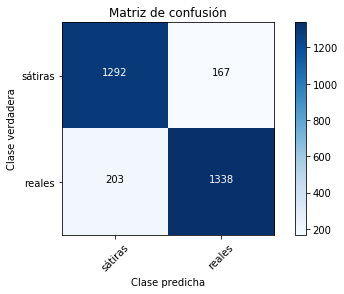

In [51]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, tf_vect_lemmatize, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_tf_vect_lemmatize)

## Experimento 4: Remocion de URLs

In [52]:
# Prueba de la tokenizacion sin urls
print(tokenize_no_urls(
    "holaaaa cómo http://estas creerías https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python mi si lloviera \t  mañana, tu crees en mi cartas ¡¡ ¿¿. aeiou"))

['holaaaa', 'cómo', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [53]:
tf_vect_no_urls = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True)

Numero de caracteristicas:  (7000, 15609)

train time: 17.122s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8474285714285714
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8446666666666667
F1_score: 0.8446390469416785
Precision: 0.8464148122592146
Recall: 0.845662915271365

             precision    recall  f1-score   support

       fake     0.8140    0.8821    0.8467      1459
       real     0.8788    0.8092    0.8426      1541

avg / total     0.8473    0.8447    0.8446      3000

[[1287  172]
 [ 294 1247]]

Confusion matrix, without normalization
[[1287  172]
 [ 294 1247]]
CPU times: user 10 s, sys: 1.54 s, total: 11.6 s
Wall time: 20.8 s


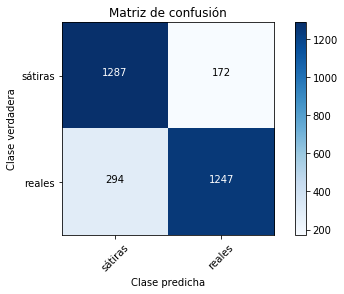

In [54]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_no_urls = run_one_experiment(total_data_content, total_data_target, tf_vect_no_urls, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_tf_vect_no_urls)

## Experimento 5: Remocion de letras repetidas

In [55]:
print(tokenize_norm_letters(
    "holaaaa cómo http://estas estaaaas creerías mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['hola', 'cómo', 'htp', 'estas', 'estas', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [56]:
tf_vect_norm_letters = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True)

Numero de caracteristicas:  (7000, 23288)

train time: 16.508s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8875714285714286
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8853333333333333
F1_score: 0.8852933644434327
Precision: 0.8852351901856852
Recall: 0.8854846665442049

             precision    recall  f1-score   support

       fake     0.8754    0.8910    0.8832      1459
       real     0.8950    0.8799    0.8874      1541

avg / total     0.8855    0.8853    0.8854      3000

[[1300  159]
 [ 185 1356]]

Confusion matrix, without normalization
[[1300  159]
 [ 185 1356]]
CPU times: user 10.9 s, sys: 1.38 s, total: 12.3 s
Wall time: 21.5 s


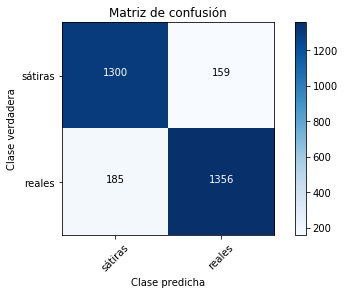

In [57]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, tf_vect_norm_letters, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_tf_vect_norm_letters)

## Experimento 6: Remocion de terminos poco comunes (pruning < 10)

In [58]:
tf_vect_pruning10 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=10)

Numero de caracteristicas:  (7000, 1218)

train time: 10.451s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8474285714285714
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8456666666666667
F1_score: 0.845102823734262
Precision: 0.8474175035868006
Recall: 0.8446486019110278

             precision    recall  f1-score   support

       fake     0.8662    0.8074    0.8358      1459
       real     0.8287    0.8819    0.8544      1541

avg / total     0.8469    0.8457    0.8454      3000

[[1178  281]
 [ 182 1359]]

Confusion matrix, without normalization
[[1178  281]
 [ 182 1359]]
CPU times: user 5.8 s, sys: 1.39 s, total: 7.19 s
Wall time: 12.7 s


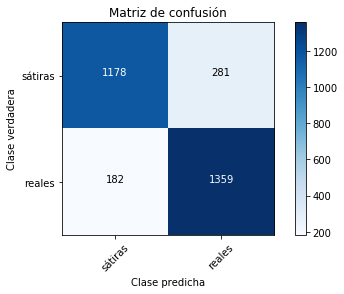

In [59]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, tf_vect_pruning10, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_tf_vect_pruning10)

## Experimento 7: Remocion de terminos poco comunes (pruning < 5)

In [60]:
tf_vect_pruning5 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=5)

Numero de caracteristicas:  (7000, 2643)

train time: 11.619s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8725714285714286
C: 100
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.861
F1_score: 0.8607262652117033
Precision: 0.8615217422338968
Recall: 0.8604310598273643

             precision    recall  f1-score   support

       fake     0.8700    0.8396    0.8546      1459
       real     0.8530    0.8812    0.8669      1541

avg / total     0.8613    0.8610    0.8609      3000

[[1225  234]
 [ 183 1358]]

Confusion matrix, without normalization
[[1225  234]
 [ 183 1358]]
CPU times: user 6.71 s, sys: 1.45 s, total: 8.16 s
Wall time: 14.2 s


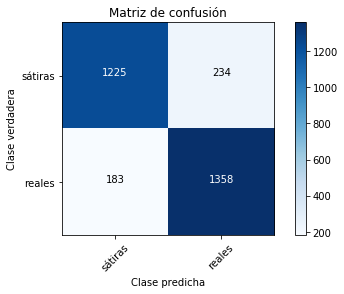

In [61]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [100]}
clf_tf_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, tf_vect_pruning5, optimal_parameters, SVC(), 90)
all_experiments_results.append(clf_tf_vect_pruning5)

In [62]:
len(all_experiments_results)

8

In [63]:
import xlsxwriter

In [64]:
# Create a workbook and add a worksheet.
# workbook = xlsxwriter.Workbook('result_es_news_fakes_svm_rbf_tf.xlsx')
# worksheet = workbook.add_worksheet()
# row = 0
# col = 0
# for exp in all_experiments_results:
#     worksheet.write(row, col, exp[0])
#     row += 1
#     worksheet.write(row, col, exp[1])
#     row += 1
#     worksheet.write(row, col, exp[2])
#     row += 1
#     worksheet.write(row, col, exp[3])
#     row += 1
#     worksheet.write(row, col, exp[4])
#     row += 1
#     worksheet.write(row, col, exp[5])
#     row += 1
#     worksheet.write(row, col, exp[6])
#     row += 1
#     worksheet.write(row, col, exp[7])
#     row += 1
#     worksheet.write(row, col, exp[8])
#     row += 1
#     row = 0
#     col += 1
# workbook.close()